In [1]:
%load_ext autoreload
%autoreload 2
import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2024-04-18 21:02:13,103 | INFO     |: info
2024-04-18 21:02:13,105 | WARNING  |: warning
2024-04-18 21:02:13,106 | ERROR    |: error
2024-04-18 21:02:13,107 | CRITICAL |: critical


In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-04-18 21:02:15,041 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-04-18 21:02:19,634 | INFO     |: Connected to c0:89:c1:6d:24:4b


C:\Users\xyx07\Fast_Robot\Webpage\FR-2024\code\Lab6\MotorMove\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Robot says -> HiHello :)


In [4]:
ble.send_command(CMD.MOVE,"180|-180")

In [5]:
ble.send_command(CMD.MOVE,"0|0")

In [6]:
raw_message=[]
#add more arrays if needed
num = []
timeIMU = [] #in seconds
yaw = []
def clear_data():
    # Clear all the sensor data arrays
    timeIMU.clear()
    yaw.clear()
def notification_handler(uuid, byte_array):
    global timeIMU,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    message = ble.bytearray_to_string(byte_array)
    if message=='IMU data received.':
        print(message)
    else: 
        readings = message.split('|')
        num.clear()
        for reading in readings:
            label, value = reading.split(':')
            num.append(float(value))
        if len(num)==2:
            if label=="Yaw":
                timeIMU.append(num[0]/1000000)
                yaw.append(num[1])

In [7]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [8]:
clear_data()
ble.send_command(CMD.MOVE,"120|-120")
ble.send_command(CMD.GET_ANGLE, "")

In [9]:
ble.send_command(CMD.MOVE,"0|0")

2024-04-18 21:04:00,376 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


In [10]:
ble.stop_notify(ble.uuid['RX_STRING'])

Exception: Not connected to a BLE device

In [11]:
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 3.675s to collect data.
Sample rate is about 280 samples/s.


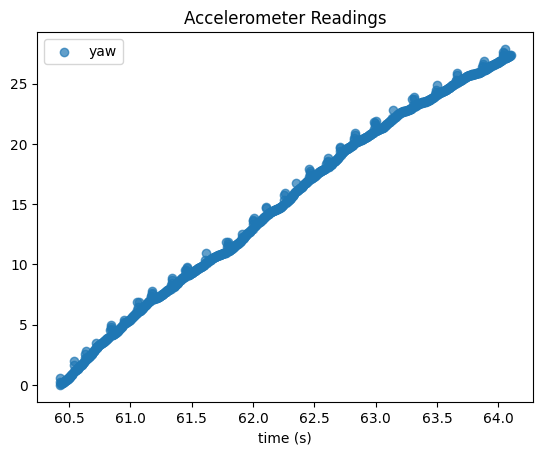

In [13]:
plt.scatter(timeIMU, yaw, label = 'yaw', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.legend();

In [24]:
# Disconnect
ble.disconnect()

2024-03-13 16:25:17,601 | INFO     |: Disconnected from C0:89:C1:6D:24:4B
